# Warehouse Optimization (Model Only)

## Initilization

In [1]:
import pandas as pd
import pandas_profiling
import numpy as np
data = pd.read_csv('ML_datafile.csv')
data.reset_index(drop=True, inplace=True)
data = data.drop(['Item No', 'Manufacturer No', 'Product Name', 'Date', 'STOCK TYPE', 'In Stock', 'List No',
                 'UPC Code', 'SaleRate','Blowout','Profit'], axis=1)
data

,Manufacturer,Category,Category Path 1,Category Path 2,Category Path 3,Price(USD),Cost price,Inventory,Shipping,weight(lb),SaleRateNew
0,Supermicro,Power Cable,Component,Cable,Power Cable,10.25,7.6875,1,2.5,1.00,0.000000
1,ASUS,Bag & Sleeve,PC & Laptop,Accessory,Bag & Sleeve,9.23,4.2300,1,2.5,0.50,0.000000
2,AMD,Others,Component,CPU / Processor,Desktop CPU,76.88,57.6600,1,2.5,0.74,0.000000
3,QNAP,DDR3 1333,Component,DRAM Memory,Notebook DRAM,76.88,57.6600,1,0.0,0.10,0.000000
4,Supermicro,Accessory,Hardware & Software,Server & Workstation,Accessory,92.76,69.5700,1,2.5,0.50,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
4195,NVIDIA,Nvidia,Component,Video Card,PCI Express Video Card,3854.00,2890.5000,1,2.5,5.00,0.370787
4196,Supermicro,Accessory,Hardware & Software,Server & Workstation,Accessory,20.50,15.3750,1,2.5,0.50,0.377778
4197,In Win,2U,Component,Server,Server Chassis,72.00,54.0000,1,3.5,24.12,0.377778
4198,iStarUSA,3U,Component,Server,Server Chassis,143.50,107.6250,1,10.0,29.00,0.377778


In [2]:
# limit to categorical data
nominal_data = data.select_dtypes(include=[object])
ordinal_data = data.drop(list(nominal_data.columns), axis=1)
nominal_data = nominal_data.replace(np.nan, 'Default', regex=True)

## One-Hot Encoding

In [3]:
from sklearn import preprocessing
nominal_data_2 = nominal_data
# 1. INSTANTIATE
enc = preprocessing.OneHotEncoder()
# 2. FIT
enc.fit(nominal_data_2)
# 3. Transform
onehotlabels = enc.transform(nominal_data_2).toarray()
print(onehotlabels.shape)

(4200, 458)


In [4]:
encoded_data = pd.concat([ordinal_data, pd.DataFrame(onehotlabels)], axis=1)

In [5]:
encoded_data.columns

Index([ 'Price(USD)',  'Cost price',   'Inventory',    'Shipping',
        'weight(lb)', 'SaleRateNew',             0,             1,
                   2,             3,
       ...
                 448,           449,           450,           451,
                 452,           453,           454,           455,
                 456,           457],
      dtype='object', length=464)

In [6]:
encoded_data.head(30)

,Price(USD),Cost price,Inventory,Shipping,weight(lb),SaleRateNew,0,1,2,3,...,448,449,450,451,452,453,454,455,456,457
0,10.25,7.6875,1,2.5,1.00,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9.23,4.2300,1,2.5,0.50,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,76.88,57.6600,1,2.5,0.74,0.000000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,76.88,57.6600,1,0.0,0.10,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,92.76,69.5700,1,2.5,0.50,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,186.55,139.9125,1,0.0,0.08,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,263.94,197.9550,1,10.0,28.00,0.000000,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,262.40,196.8000,1,2.5,5.00,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,263.42,197.5650,1,2.5,6.50,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,480.72,360.5400,1,2.5,0.50,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
#Library Import
import random
import pandas as pd
import numpy as np
import pickle
from math import sqrt
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import validation_curve

## Data Split

In [9]:
X = encoded_data.drop('SaleRateNew', axis=1)
Y = encoded_data['SaleRateNew']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state = 1)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size= 0.5, random_state = 1)
X_train.head(5)

,Price(USD),Cost price,Inventory,Shipping,weight(lb),0,1,2,3,4,...,448,449,450,451,452,453,454,455,456,457
2490,81.99,61.4925,5,2.5,3.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3291,146.58,109.9350,16,0.0,0.10,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1690,40.99,30.7425,150,2.5,0.84,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1672,145.00,108.7500,5,0.0,0.07,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
255,25.62,19.2150,24,2.5,0.50,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Training with validation 

In [11]:
from matplotlib import pyplot as plt
%matplotlib inline

def train(models, X, Y, iterations = 5):
    results = {}
    for i in models:
        print("\nRunning ", i)
        r2_train = []
        r2_val = []
        mae_train = []
        mae_val = []
        mse_train = []
        mse_val = []
        mabe_train = []
        mabe_val = []
        mevs_train = []
        mevs_val = []
        for j in range(1, iterations):
            print(j, end='')
            h = int(4200/iterations*j)
            r2_val.append(metrics.r2_score(y_val,
                                            models[i].fit(X_train.head(h), 
                                                         y_train.head(h)).predict(X_val)))
            r2_train.append(metrics.r2_score(y_train, 
                                            models[i].fit(X_train.head(h), 
                                                         y_train.head(h)).predict(X_train)))
            mae_val.append(metrics.mean_absolute_error(y_val,
                                            models[i].fit(X_train.head(h), 
                                                         y_train.head(h)).predict(X_val)))
            mae_train.append(metrics.mean_absolute_error(y_train, 
                                            models[i].fit(X_train.head(h), 
                                                         y_train.head(h)).predict(X_train)))
            mse_val.append(metrics.mean_squared_error(y_val,
                                            models[i].fit(X_train.head(h), 
                                                         y_train.head(h)).predict(X_val)))
            mse_train.append(metrics.mean_squared_error(y_train, 
                                            models[i].fit(X_train.head(h), 
                                                         y_train.head(h)).predict(X_train)))
            mabe_val.append(metrics.median_absolute_error(y_val,
                                            models[i].fit(X_train.head(h), 
                                                         y_train.head(h)).predict(X_val)))
            mabe_train.append(metrics.median_absolute_error(y_train, 
                                            models[i].fit(X_train.head(h), 
                                                         y_train.head(h)).predict(X_train)))
            mevs_val.append(metrics.explained_variance_score(y_val,
                                            models[i].fit(X_train.head(h), 
                                                         y_train.head(h)).predict(X_val)))
            mevs_train.append(metrics.explained_variance_score(y_train, 
                                            models[i].fit(X_train.head(h), 
                                                    y_train.head(h)).predict(X_train)))
            
#R2 score
        fig, ax = plt.subplots()       
        plt.xlabel('Iterations') 
        plt.ylabel('Score') 
        ax.plot(r2_train, label='train')
        ax.plot(r2_val, label='test')
        plt.title("r2_val-train_score " + i)
        ax.legend()
        plt.figure()
#mae
        fig, ax = plt.subplots() 
        plt.xlabel('Iterations') 
        plt.ylabel('Score')
        ax.plot(mae_train, label='train')
        ax.plot(mae_val, label='test')
        plt.title("mean_absolute_error_train-val " + i)
        ax.legend()
        plt.figure()
#mse
        fig, ax = plt.subplots() 
        plt.xlabel('Iterations') 
        plt.ylabel('Score')
        ax.plot(mse_train, label='train')
        ax.plot(mse_val, label='val')
        plt.title("mean_squared_error_train-val " + i)
        ax.legend()
        plt.figure()
#mabe        
        fig, ax = plt.subplots() 
        plt.xlabel('Iterations') 
        plt.ylabel('Score')
        ax.plot(mabe_train, label='train')
        ax.plot(mabe_val, label='val')
        plt.title("median_absolute_error_train-val " + i)
        ax.legend()
        plt.figure()
#mevs
        fig, ax = plt.subplots()
        plt.xlabel('Iterations') 
        plt.ylabel('Score')
        ax.plot(mevs_train, label='train')
        ax.plot(mevs_val, label='val')
        plt.title("explained_variance_score_train-val " + i)
        ax.legend()
        plt.figure()
        
        results[i] = [r2_val[-1],r2_train[-1],mae_val[-1],mae_train[-1],mse_val[-1],mse_train[-1],mabe_val[-1],mabe_train[-1],
                      mevs_val[-1],mevs_train[-1]]
    return pd.DataFrame(results), models

In [12]:
models = {'ElasticNet': linear_model.ElasticNet(),
          'Lasso': linear_model.Lasso(),
          'Ridge': linear_model.Ridge(),
          'GBM': GradientBoostingRegressor(),
          'ada': AdaBoostRegressor(),
          'RFR':RandomForestRegressor()}


Running  ElasticNet
123456789
Running  Lasso
123456789
Running  Ridge
123456789
Running  GBM
123456789
Running  ada
123456789
Running  RFR
123456789Wall time: 6min 20s


,ElasticNet,Lasso,Ridge,GBM,ada,RFR
0,0.631078,0.632811,0.651056,0.825524,0.828998,0.801620
1,0.670091,0.669600,0.725177,0.911566,0.861429,0.973239
2,0.503274,0.503995,0.466517,0.247081,0.268000,0.242388
3,0.485425,0.486787,0.429148,0.210046,0.243468,0.097268
4,0.510555,0.508157,0.482907,0.240041,0.239579,0.248948
5,0.442460,0.443118,0.368581,0.118604,0.190690,0.034788
6,0.407885,0.409177,0.338545,0.103872,0.110034,0.097812
7,0.406993,0.409015,0.324720,0.097973,0.113266,0.038492
8,0.634449,0.636114,0.652663,0.826166,0.825930,0.814599
9,0.670091,0.669600,0.725177,0.911566,0.858003,0.974172


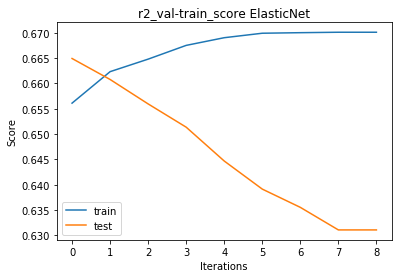

<Figure size 432x288 with 0 Axes>

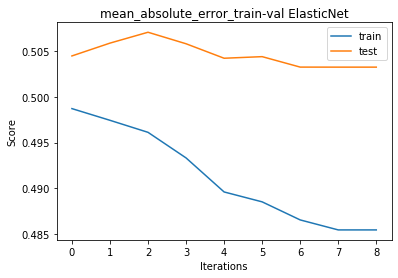

<Figure size 432x288 with 0 Axes>

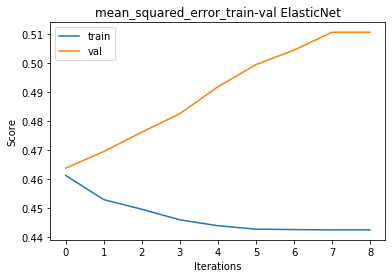

<Figure size 432x288 with 0 Axes>

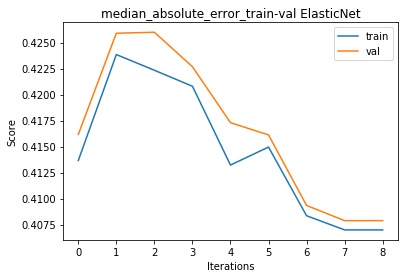

<Figure size 432x288 with 0 Axes>

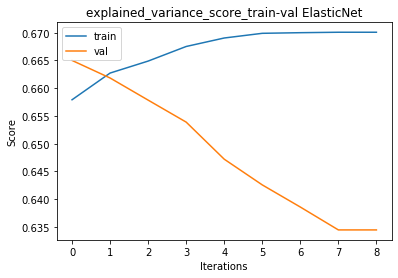

<Figure size 432x288 with 0 Axes>

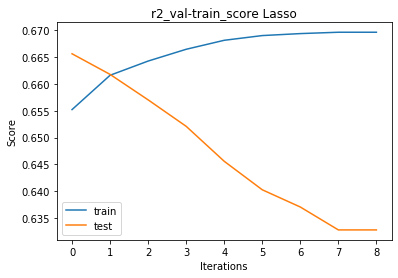

<Figure size 432x288 with 0 Axes>

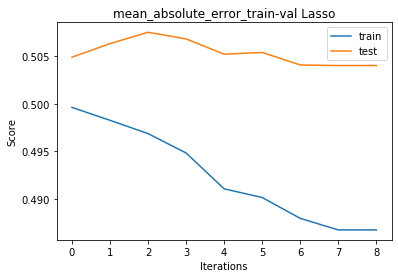

<Figure size 432x288 with 0 Axes>

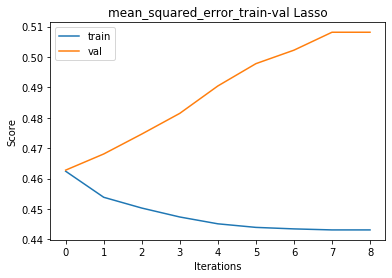

<Figure size 432x288 with 0 Axes>

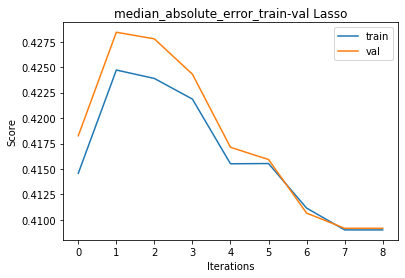

<Figure size 432x288 with 0 Axes>

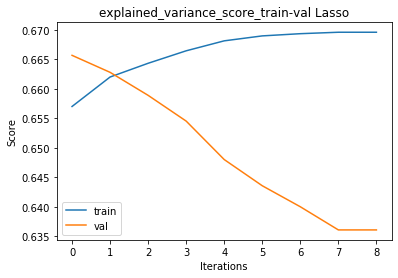

<Figure size 432x288 with 0 Axes>

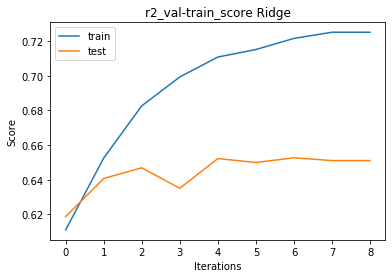

<Figure size 432x288 with 0 Axes>

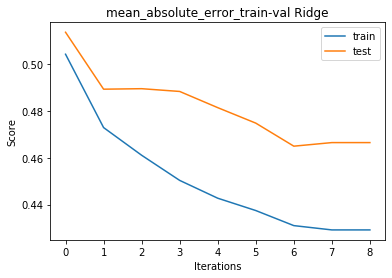

<Figure size 432x288 with 0 Axes>

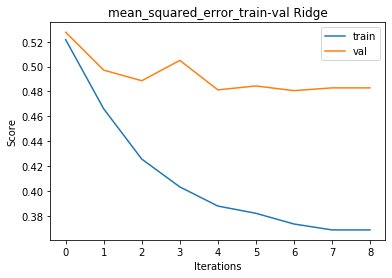

<Figure size 432x288 with 0 Axes>

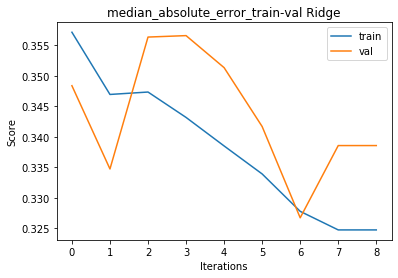

<Figure size 432x288 with 0 Axes>

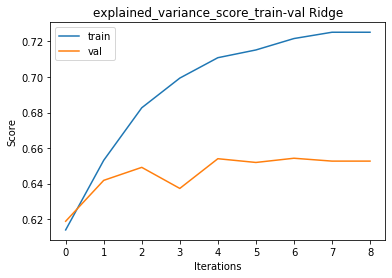

<Figure size 432x288 with 0 Axes>

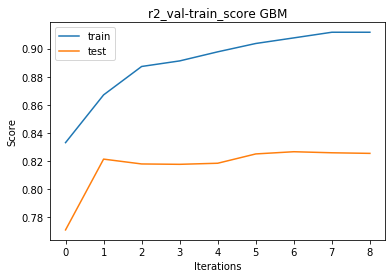

<Figure size 432x288 with 0 Axes>

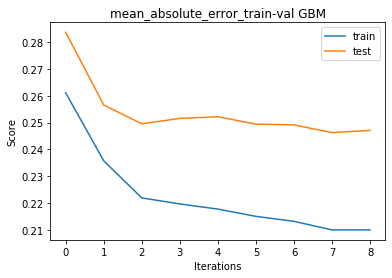

<Figure size 432x288 with 0 Axes>

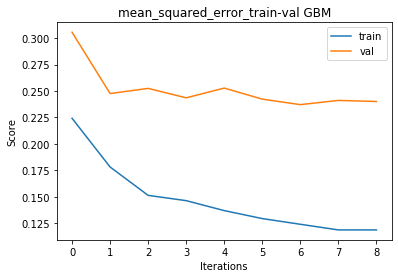

<Figure size 432x288 with 0 Axes>

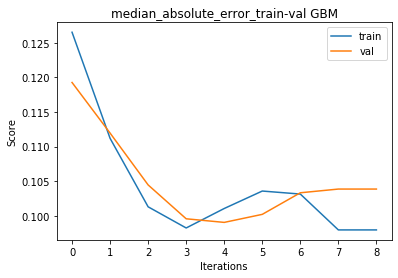

<Figure size 432x288 with 0 Axes>

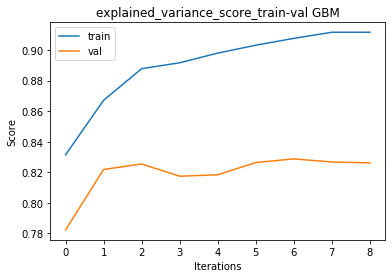

<Figure size 432x288 with 0 Axes>

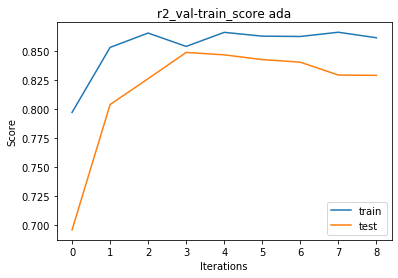

<Figure size 432x288 with 0 Axes>

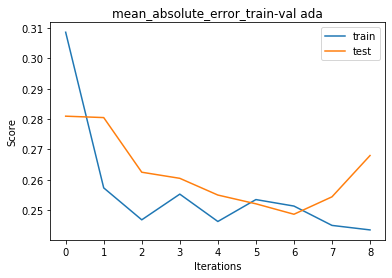

<Figure size 432x288 with 0 Axes>

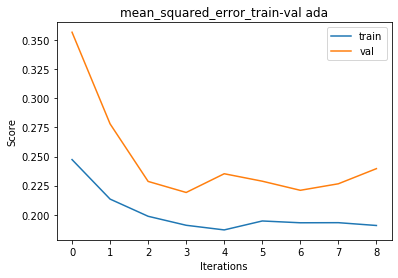

<Figure size 432x288 with 0 Axes>

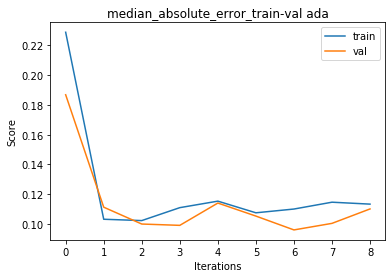

<Figure size 432x288 with 0 Axes>

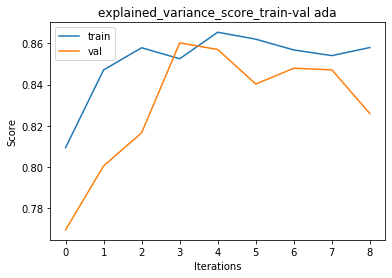

<Figure size 432x288 with 0 Axes>

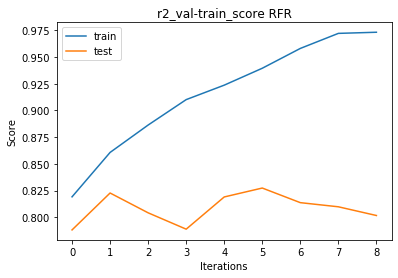

<Figure size 432x288 with 0 Axes>

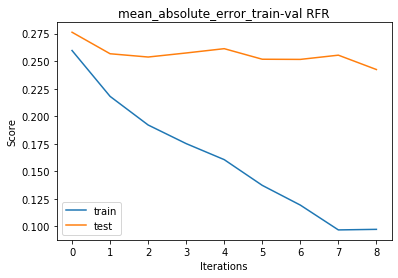

<Figure size 432x288 with 0 Axes>

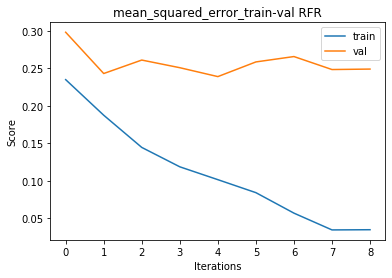

<Figure size 432x288 with 0 Axes>

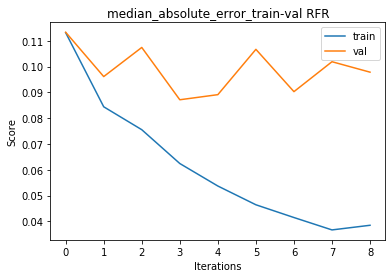

<Figure size 432x288 with 0 Axes>

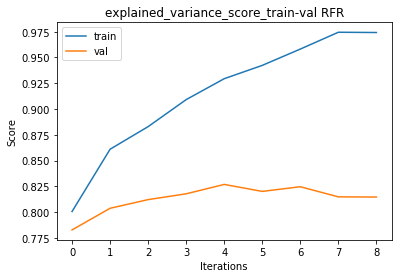

<Figure size 432x288 with 0 Axes>

In [13]:
%time result, models = train(models, X, Y, iterations=100)
result

In [14]:
y_test.head(10)

2424    0.100000
2779    1.457143
2011    1.181818
986     0.031250
3298    0.120000
3707    0.200000
2967    0.242424
1453    0.038462
3849    1.583333
2871    1.485714
Name: SaleRateNew, dtype: float64

#### Save and Load Machine Learning Models

In [15]:
from joblib import dump, load
dump(models['ElasticNet'], 'ElasticNet.joblib')

['ElasticNet.joblib']

In [16]:
ElasticNet = load('ElasticNet.joblib') 

In [17]:
from joblib import dump, load
dump(models['Lasso'], 'Lasso.joblib')

['Lasso.joblib']

In [18]:
Lasso = load('Lasso.joblib') 

In [19]:
from joblib import dump, load
dump(models['Ridge'], 'Ridge.joblib')

['Ridge.joblib']

In [20]:
Ridge = load('Ridge.joblib') 

In [21]:
from joblib import dump, load
dump(models['ada'], 'ada.joblib') 

['ada.joblib']

In [22]:
ada = load('Ada.joblib') 

In [23]:
from joblib import dump, load
dump(models['GBM'], 'GBM.joblib')

['GBM.joblib']

In [24]:
GBM = load('GBM.joblib') 

In [25]:
from joblib import dump, load
dump(models['RFR'], 'RFR.joblib')

['RFR.joblib']

In [26]:
RFR = load('RFR.joblib') 

#### Tunning

In [27]:
ridge_params = {'alpha':[200, 230, 250,265, 270, 275, 290, 300, 500]}

ada_param = {
 'n_estimators': [50],
 'learning_rate' : [0.01,0.05,0.1,0.3,1],
 'loss' : ['linear', 'square', 'exponential']
 }

gbm_param = {
 'n_estimators': [50, 100],
 'learning_rate' : [0.01,0.05,0.1,0.3,1],
 'max_depth':[1,3,5,7,9],
 'loss' : ['ls', 'lad', 'huber', 'quantile']
 }

RFR_param = {
    'bootstrap': [True],
    'max_depth': [None],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}


models2 = {'Ridge': GridSearchCV(linear_model.Ridge(), 
                               param_grid=ridge_params).fit(X, Y).best_estimator_,
           'Ada': GridSearchCV(AdaBoostRegressor(), 
                               param_grid=ada_param).fit(X, Y).best_estimator_,
           'GBM': GridSearchCV(GradientBoostingRegressor(), 
                               param_grid=gbm_param).fit(X, Y).best_estimator_,
           'RFR': GridSearchCV(RandomForestRegressor(), 
                              param_grid=RFR_param).fit(X, Y).best_estimator_}


Running  Ridge
1234
Running  Ada
1234
Running  GBM
1234
Running  RFR
1234Wall time: 3min 15s


(      Ridge       Ada       GBM       RFR
 0  0.644343  0.799753  0.694615  0.229423
 1  0.692095  0.811804  0.754888  0.241620
 2  0.482903  0.395887  0.380492  0.686862
 3  0.460479  0.394143  0.368421  0.659985
 4  0.492198  0.284796  0.422625  1.081687
 5  0.412949  0.295855  0.328734  1.023874
 6  0.374566  0.298821  0.211995  0.597762
 7  0.378324  0.364490  0.213133  0.588283
 8  0.646950  0.724737  0.781914  0.194191
 9  0.692095  0.813662  0.837088  0.231278,
 {'Ridge': Ridge(alpha=200, copy_X=True, fit_intercept=True, max_iter=None,
        normalize=False, random_state=None, solver='auto', tol=0.001),
  'Ada': AdaBoostRegressor(base_estimator=None, learning_rate=1, loss='exponential',
                    n_estimators=50, random_state=None),
  'GBM': GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='quantile', max_depth=1,
                            max_features=None, max_leaf_nodes=None,
         

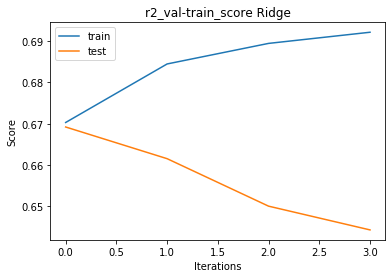

<Figure size 432x288 with 0 Axes>

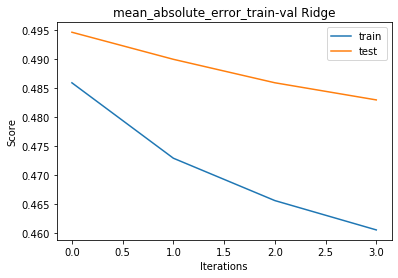

<Figure size 432x288 with 0 Axes>

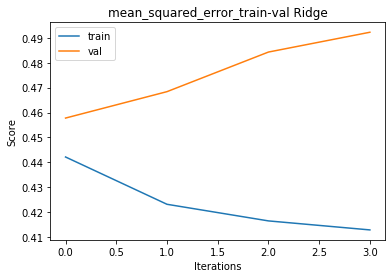

<Figure size 432x288 with 0 Axes>

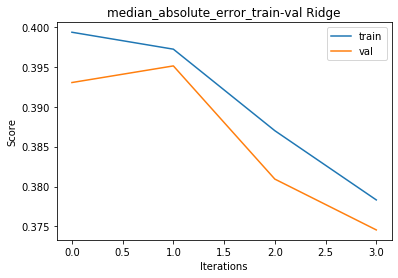

<Figure size 432x288 with 0 Axes>

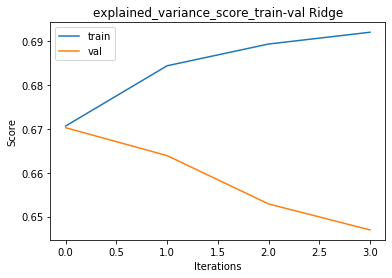

<Figure size 432x288 with 0 Axes>

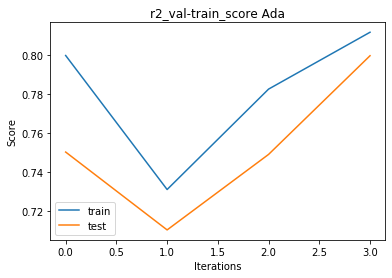

<Figure size 432x288 with 0 Axes>

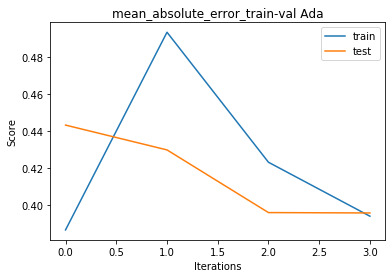

<Figure size 432x288 with 0 Axes>

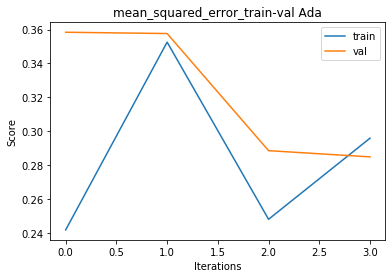

<Figure size 432x288 with 0 Axes>

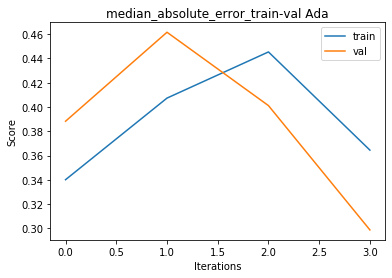

<Figure size 432x288 with 0 Axes>

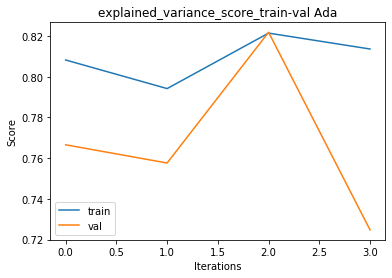

<Figure size 432x288 with 0 Axes>

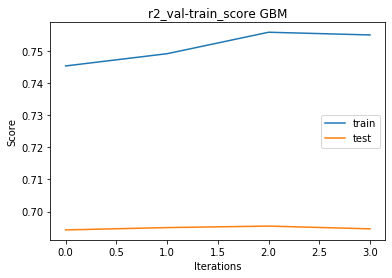

<Figure size 432x288 with 0 Axes>

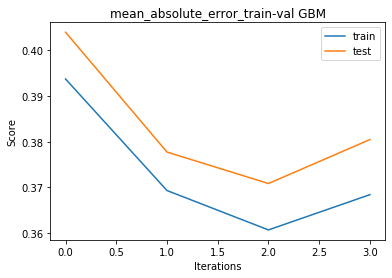

<Figure size 432x288 with 0 Axes>

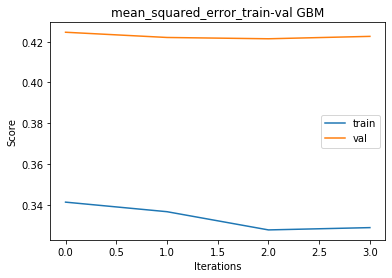

<Figure size 432x288 with 0 Axes>

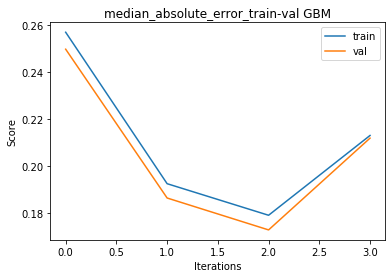

<Figure size 432x288 with 0 Axes>

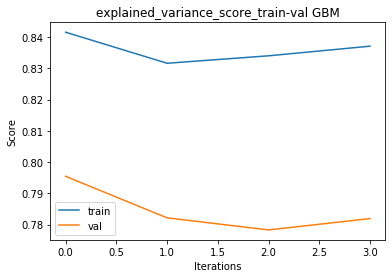

<Figure size 432x288 with 0 Axes>

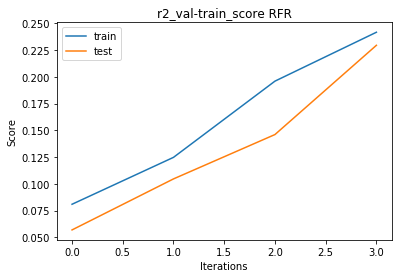

<Figure size 432x288 with 0 Axes>

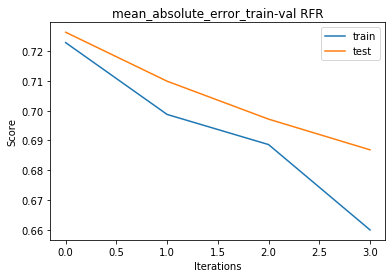

<Figure size 432x288 with 0 Axes>

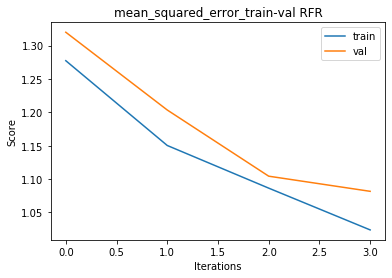

<Figure size 432x288 with 0 Axes>

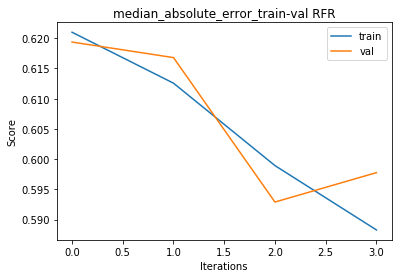

<Figure size 432x288 with 0 Axes>

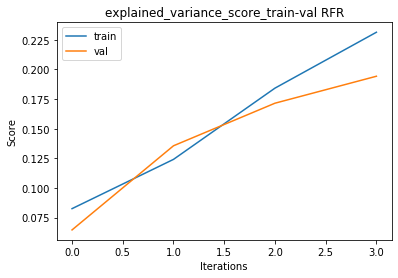

<Figure size 432x288 with 0 Axes>

In [28]:
%time train(models2, X, Y)

In [29]:
X_test.Inventory

2424     4
2779    51
2011    52
986      2
3298     3
        ..
416     30
1823     4
1167     1
2458    51
2425     6
Name: Inventory, Length: 420, dtype: int64

#### Model prediction with Testing

In [30]:
#model prediction with testing
from matplotlib import pyplot as plt
%matplotlib inline

def test2(models, X, Y, iterations = 10):
    results = {}
    for i in models:
        print("\nRunning ", i)
        table = dict()
        for j in range(1, iterations):
            print(j, end='')
            table['r2_test'] = metrics.r2_score(y_test, models[i].predict(X_test))
            table['r2_train'] = metrics.r2_score(y_train, models[i].predict(X_train))
            table['mae_test'] = metrics.mean_absolute_error(y_test, models[i].predict(X_test))
            table['mae_train'] = metrics.mean_absolute_error(y_train, models[i].predict(X_train))
            table['mse_test'] = metrics.mean_squared_error(y_test, models[i].predict(X_test))
            table['mse_train'] = metrics.mean_squared_error(y_train, models[i].predict(X_train))
            table['mabe_test'] = metrics.median_absolute_error(y_test, models[i].predict(X_test))
            table['mabe_train'] = metrics.median_absolute_error(y_train, models[i].predict(X_train))
            table['mevs_test'] = metrics.explained_variance_score(y_test, models[i].predict(X_test))
            table['mevs_train'] = metrics.explained_variance_score(y_train, models[i].predict(X_train))
            
            #R2 score
        fig, ax = plt.subplots()       
        plt.xlabel('Iterations') 
        plt.ylabel('Score') 
        ax.plot(table['r2_test'], label='train')
        ax.plot(['r2_train'], label='test')
        plt.title("r2_val-train_score " + i)
        ax.legend()
        plt.figure()
             
        results[i] = table
    return pd.DataFrame(results), models

In [31]:
from joblib import dump, load
models = {'ElasticNet': load('ElasticNet.joblib'),
          'Lasso': load('Lasso.joblib'), 
          'Ridge': load('Ridge.joblib'),
          'ada'  : load('ada.joblib'),
          'GBM'  : load('GBM.joblib'),
          'RFR'  : load('RFR.joblib')}

In [32]:
models

{'ElasticNet': ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
            max_iter=1000, normalize=False, positive=False, precompute=False,
            random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
 'Lasso': Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
       normalize=False, positive=False, precompute=False, random_state=None,
       selection='cyclic', tol=0.0001, warm_start=False),
 'Ridge': Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
       normalize=False, random_state=None, solver='auto', tol=0.001),
 'ada': AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                   n_estimators=50, random_state=None),
 'GBM': GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='ls', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decre


Running  ElasticNet
123456789
Running  Lasso
123456789
Running  Ridge
123456789
Running  ada
123456789
Running  GBM
123456789
Running  RFR
123456789Wall time: 13.5 s


,ElasticNet,Lasso,Ridge,ada,GBM,RFR
r2_test,0.572168,0.570455,0.577496,0.812136,0.852457,0.832972
r2_train,0.670091,0.669600,0.725177,0.857103,0.911566,0.974159
mae_test,0.448135,0.449581,0.420216,0.226821,0.198901,0.208016
mae_train,0.485425,0.486787,0.429148,0.262996,0.210046,0.096409
mse_test,0.346333,0.347720,0.342019,0.152077,0.119437,0.135210
mse_train,0.442460,0.443118,0.368581,0.191647,0.118604,0.034657
mabe_test,0.401123,0.403648,0.324597,0.101907,0.076123,0.084282
mabe_train,0.406993,0.409015,0.324720,0.121139,0.097973,0.038496
mevs_test,0.573243,0.571585,0.578245,0.813639,0.852502,0.832976
mevs_train,0.670091,0.669600,0.725177,0.858003,0.911566,0.974172


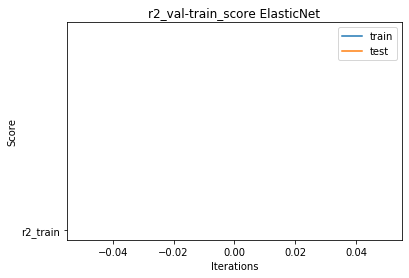

<Figure size 432x288 with 0 Axes>

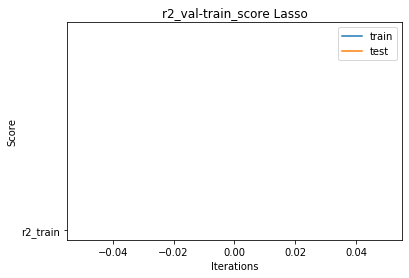

<Figure size 432x288 with 0 Axes>

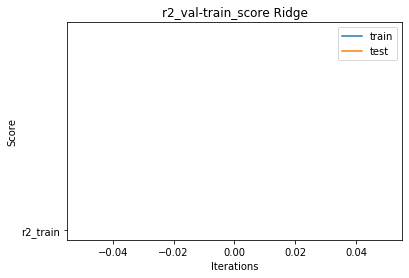

<Figure size 432x288 with 0 Axes>

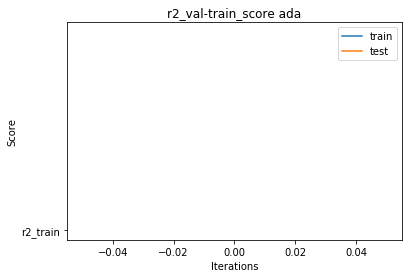

<Figure size 432x288 with 0 Axes>

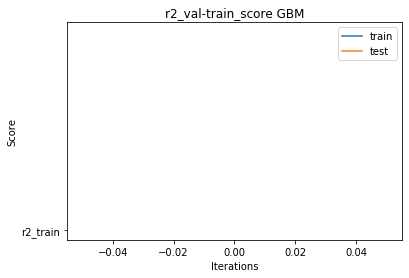

<Figure size 432x288 with 0 Axes>

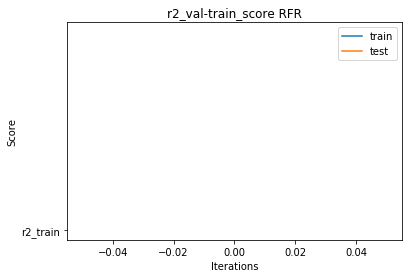

<Figure size 432x288 with 0 Axes>

In [33]:
%time result, models = test2(models, X, Y)
result

In [34]:
for i in result:
    print(dict(result[i]))

{'r2_test': 0.5721683377914588, 'r2_train': 0.6700906868450269, 'mae_test': 0.4481352151150305, 'mae_train': 0.48542538458591805, 'mse_test': 0.34633250115477315, 'mse_train': 0.4424602921675723, 'mabe_test': 0.40112274556797534, 'mabe_train': 0.40699316250632905, 'mevs_test': 0.5732428673546381, 'mevs_train': 0.6700906868450269}
{'r2_test': 0.5704548745520612, 'r2_train': 0.6695999188721289, 'mae_test': 0.44958072608490257, 'mae_train': 0.48678655354498274, 'mse_test': 0.34771956074328964, 'mse_train': 0.44311848922966296, 'mabe_test': 0.40364833584653403, 'mabe_train': 0.4090153752781981, 'mevs_test': 0.5715850613385692, 'mevs_train': 0.6695999188721289}
{'r2_test': 0.5774963504040125, 'r2_train': 0.7251772453166718, 'mae_test': 0.420216058977424, 'mae_train': 0.42914773221403246, 'mse_test': 0.3420194404412104, 'mse_train': 0.3685805507235328, 'mabe_test': 0.3245969454872494, 'mabe_train': 0.32472014683694383, 'mevs_test': 0.5782446823655427, 'mevs_train': 0.7251772453166719}
{'r2_t

In [35]:
import seaborn as sb

r2_test


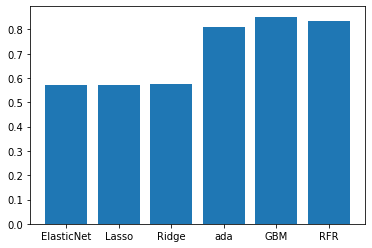

r2_train


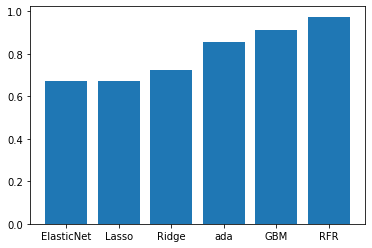

mae_test


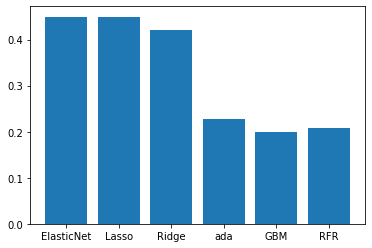

mae_train


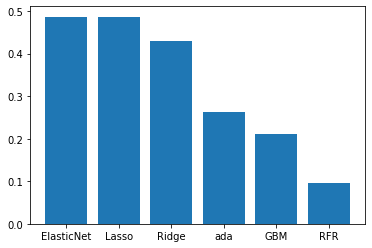

mse_test


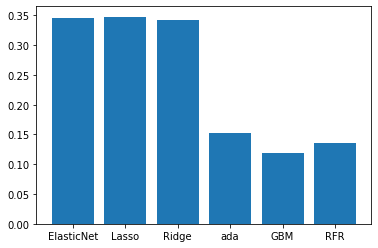

mse_train


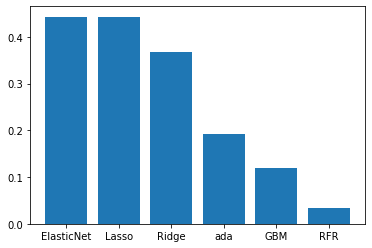

mabe_test


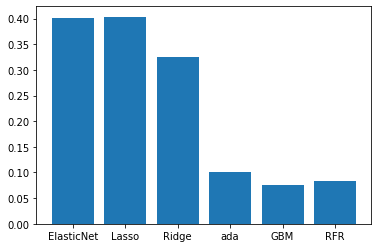

mabe_train


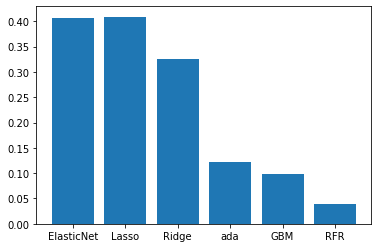

mevs_test


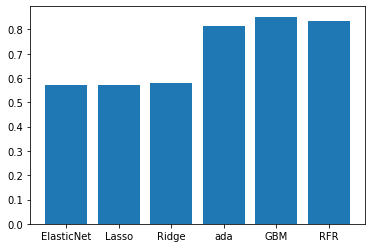

mevs_train


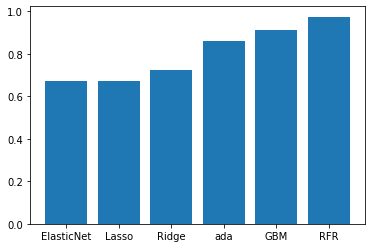

In [36]:
import matplotlib.pyplot as plt
result = result.transpose()
for key in result:
    print(key)
    plt.bar(range(len(dict(result[key]))), list(dict(result[key]).values()), align='center')
    plt.xticks(range(len(dict(result[key]))), list(dict(result[key]).keys()))
    plt.show()

In [38]:
range(len(dict(result[key])))

range(0, 6)

In [ ]:
models

In [ ]:
X_test

#### Number of days prediction (i.e Blowout period)

In [ ]:
y_pred = GBM.predict(X_test)
print(y_pred[:10])
print(y_test.head(10))

In [ ]:
y_test

In [ ]:
#blowout period identification using best performing algorithm
X_test['y_pred'] = y_pred
X_test['blowout_pred'] = pd.DataFrame({"Days" : X_test.Inventory / X_test['y_pred']})
X_test['blowout_test'] = pd.DataFrame({"Days" : X_test.Inventory / y_test})
X_test.head(10)

In [ ]:
pd.plotting.hist_series(Y)